In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

df = pd.read_csv("Parth_Darshan_EDA.csv")
df.head()

,CustomerID,TransactionValue,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,3354.52,False,False,False,True
1,C0002,1862.74,True,False,False,False
2,C0003,2725.38,False,False,False,True
3,C0004,5354.88,False,False,False,True
4,C0005,2034.24,True,False,False,False


In [4]:
df = df.drop("CustomerID", axis = 1)

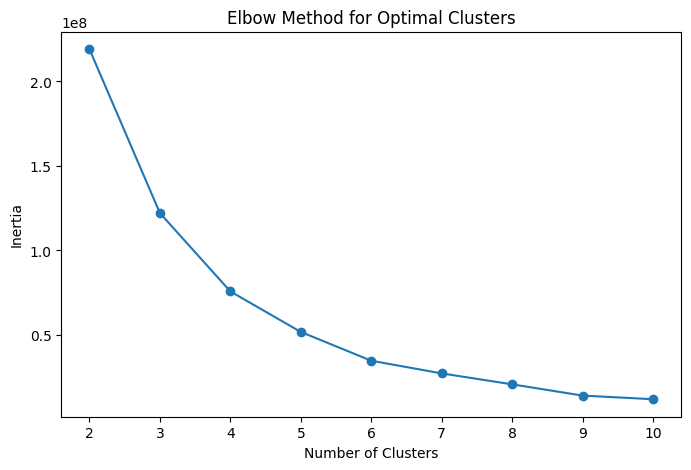

In [6]:
inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Since the least steep curve is between n = 9 and n = 10, the optimal number of clusters is 9.

In [7]:
optimal_k = 9
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)
df["Cluster"] = clusters

In [8]:
db_index = davies_bouldin_score(df, clusters)
silhouette_avg = silhouette_score(df, clusters)
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.44977883971346194
Silhouette Score: 0.5499004974486743


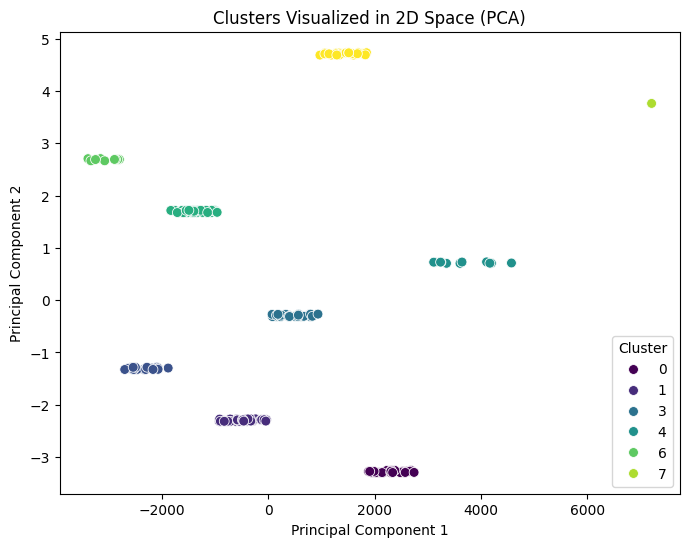

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette="viridis", s=50)
plt.title("Clusters Visualized in 2D Space (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()